<a href="https://colab.research.google.com/github/aegis-iit/AEGIS/blob/master/cocoapi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir("gdrive/My Drive/Aegis")

In [0]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [0]:
path = 'annotations/annotations/instances_val2017.json'

In [5]:
coco=COCO(path)

loading annotations into memory...
Done (t=1.52s)
creating index...
index created!


In [6]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
person vehicle electronic outdoor indoor sports furniture accessory kitchen food appliance animal


In [0]:
catIds = coco.getCatIds(catNms=['1']);
# imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [252219])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

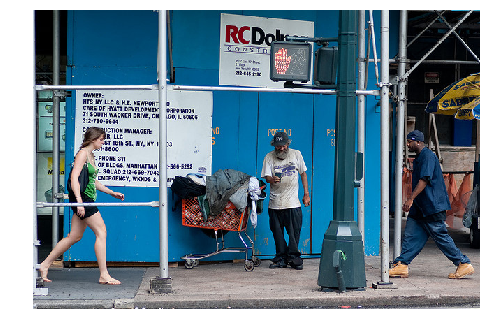

In [8]:
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

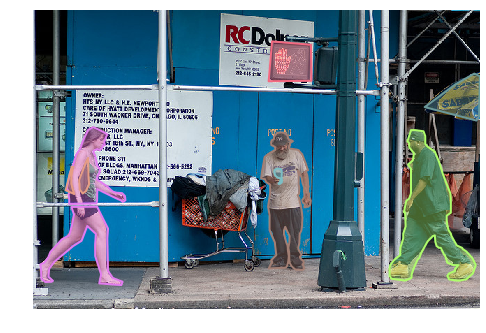

In [9]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [0]:
 def _load_coco_annotation(self, index):
        """
    Loads COCO bounding-box instance annotations. Crowd instances are
    handled by marking their overlaps (with all categories) to -1. This
    overlap value means that crowd "instances" are excluded from training.
    """
       
        im_ann = self._COCO.loadImgs(index)[0]
        width = im_ann['width']
        height = im_ann['height']
        
        annIds = self._COCO.getAnnIds(imgIds=index, catIds=self._c_to_keep, iscrowd=None)
        objs = self._COCO.loadAnns(annIds)
        
        
        ########## Where the boxes are extracted !
        valid_objs = []
        for obj in objs:
            x1 = np.max((0, obj['bbox'][0]))
            y1 = np.max((0, obj['bbox'][1]))
            x2 = np.min((width - 1, x1 + np.max((0, obj['bbox'][2] - 1))))
            y2 = np.min((height - 1, y1 + np.max((0, obj['bbox'][3] - 1))))
            if obj['area'] > 0 and x2 >= x1 and y2 >= y1:
                obj['clean_bbox'] = [x1, y1, x2, y2]
                valid_objs.append(obj)
        objs = valid_objs
        
        #########################
        
        self._total_positive += 1 if len(objs) >= 1 else 0 # <-------------- ADDED
        
        num_objs = len(objs)
        

        boxes = np.zeros((num_objs, 4), dtype=np.uint16)
        gt_classes = np.zeros((num_objs), dtype=np.int32)
        overlaps = np.zeros((num_objs, self.num_classes), dtype=np.float32)
        seg_areas = np.zeros((num_objs), dtype=np.float32)

        return {
            'width': width,
            'height': height,
            'boxes': boxes,
            'gt_classes': gt_classes,
            'gt_overlaps': overlaps,
            'flipped': False,
            'seg_areas': seg_areas
        }
